In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


pd.set_option('display.max_columns', None)

## 1. Data Analysis

In [95]:
df = pd.read_csv('Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [96]:
df.shape

(1470, 35)

### 1.1 Lets deal with Target column. Lets covert YES to 1 and NO to 0 :

In [97]:
df['Attrition'] = np.where(df.Attrition == "Yes", 1,0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### 1.2 Understand the Data Types

In [98]:
df.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### 1.3 Check for Missing Values

In [99]:
df.isnull().values.any()

False

In [100]:
# look for Null values :

df.isnull().sum()     ## or we can also use df.isnull().any() ## or df.isnull().values.any()------> gives o/p as TRUE or FALSE.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 1.4 Drop some columns with constant values

In [101]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)
df.shape

(1470, 31)

## 1.5 Saggregate the Numerical Data and Categorical Data

In [102]:
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical

######################### OR ###########################
# cat = df.select_dtypes(include = 'object')
# cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [103]:
numerical = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical

######################### OR ###########################
# num = attrition.select_dtypes(include = ['float64', 'int64'])
# num

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [104]:
len(numerical)

24

#### 1.5.1 Numerical variables are usually of 2 types : 1.Discrete and 2.Continuous

In [105]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")

        
disc_col.remove('Attrition')        

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [106]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


In [107]:
cont_col

['Age',
 'DailyRate',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

### 1.6 Lets analyse the continuous values by creating histograms to understand the distribution

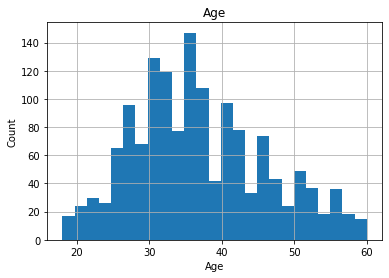

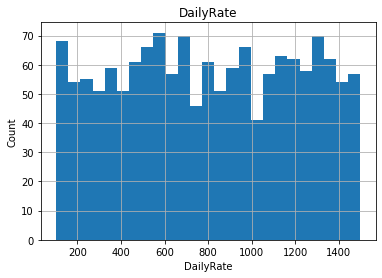

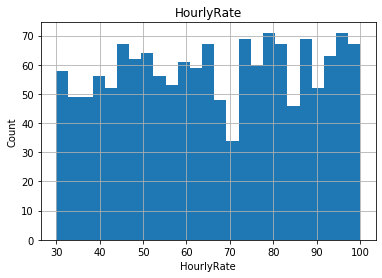

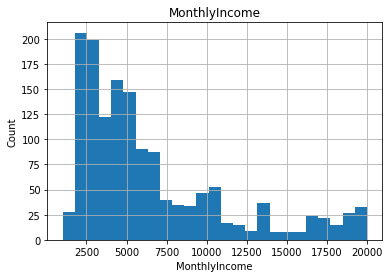

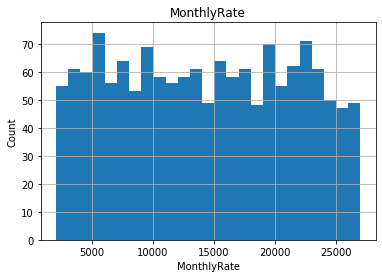

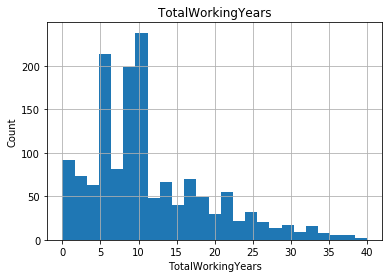

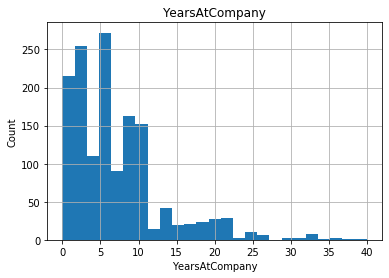

In [108]:

for feature in cont_col:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [109]:
## Conclusion from above : MonthlyIncome, TotalWorkingYears, YearsAtCompany are skewed (Right Skewed).

## 1.7 Check for Outliers

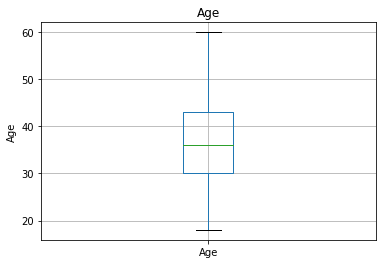

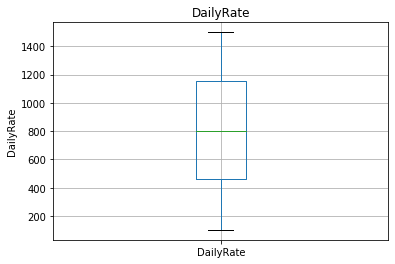

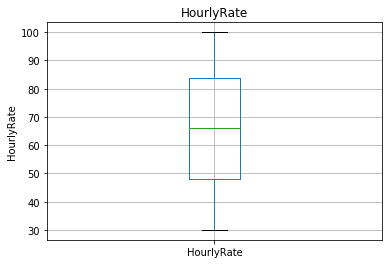

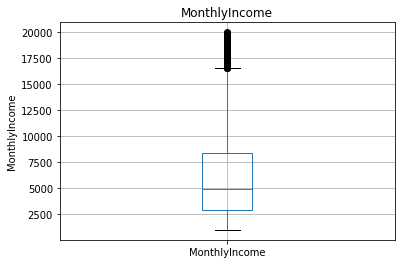

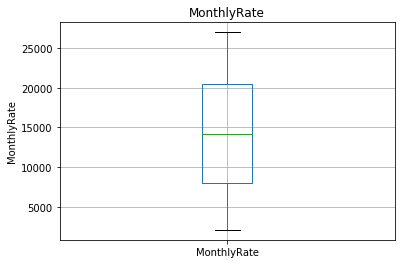

In [110]:
for feature in cont_col:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

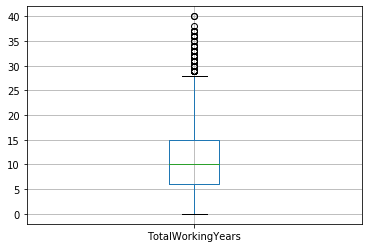

In [111]:
df.boxplot(column='TotalWorkingYears')

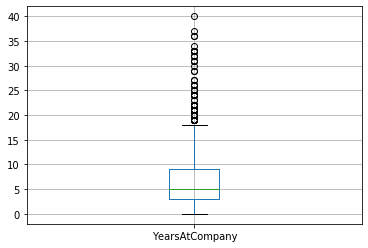

In [112]:
df.boxplot(column='YearsAtCompany')

In [113]:
## Conclusion : There are outliers present in MonthlyIncome, TotalWorkingYears, and YearsAtCompany.

In [114]:
df["Attrition"].value_counts().keys().tolist()

[0, 1]

## CrossTab :

In [129]:
pd.crosstab(df['MonthlyIncome'].mean(), [df['Education'], df['Attrition']], rownames=['MonthlyIncome'], colnames=['Education','Attrition'])

Education        1        2        3        4       5   
Attrition        0   1    0   1    0   1    0   1   0  1
MonthlyIncome                                           
6502.931293    139  31  238  44  473  99  340  58  43  5

In [1]:
## There are more people with Education Level 3 and 4 who will most probably leave the company with the Avg Income(6502.93)

## There are only 237 employees, out of total employees who will leave the company with Avg Income(6502.93)

## 2. Visualization

### 2.1 Pie plot to see the percentage of 0 and 1 in "Attrition" column

In [115]:
#labels
lab = df["Attrition"].value_counts().keys().tolist()   ##-------------> [0,1]

#values
val = df["Attrition"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Employee attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

### 2.2 Histograms to see percentage of 0 and 1 in each of Discrete Columns

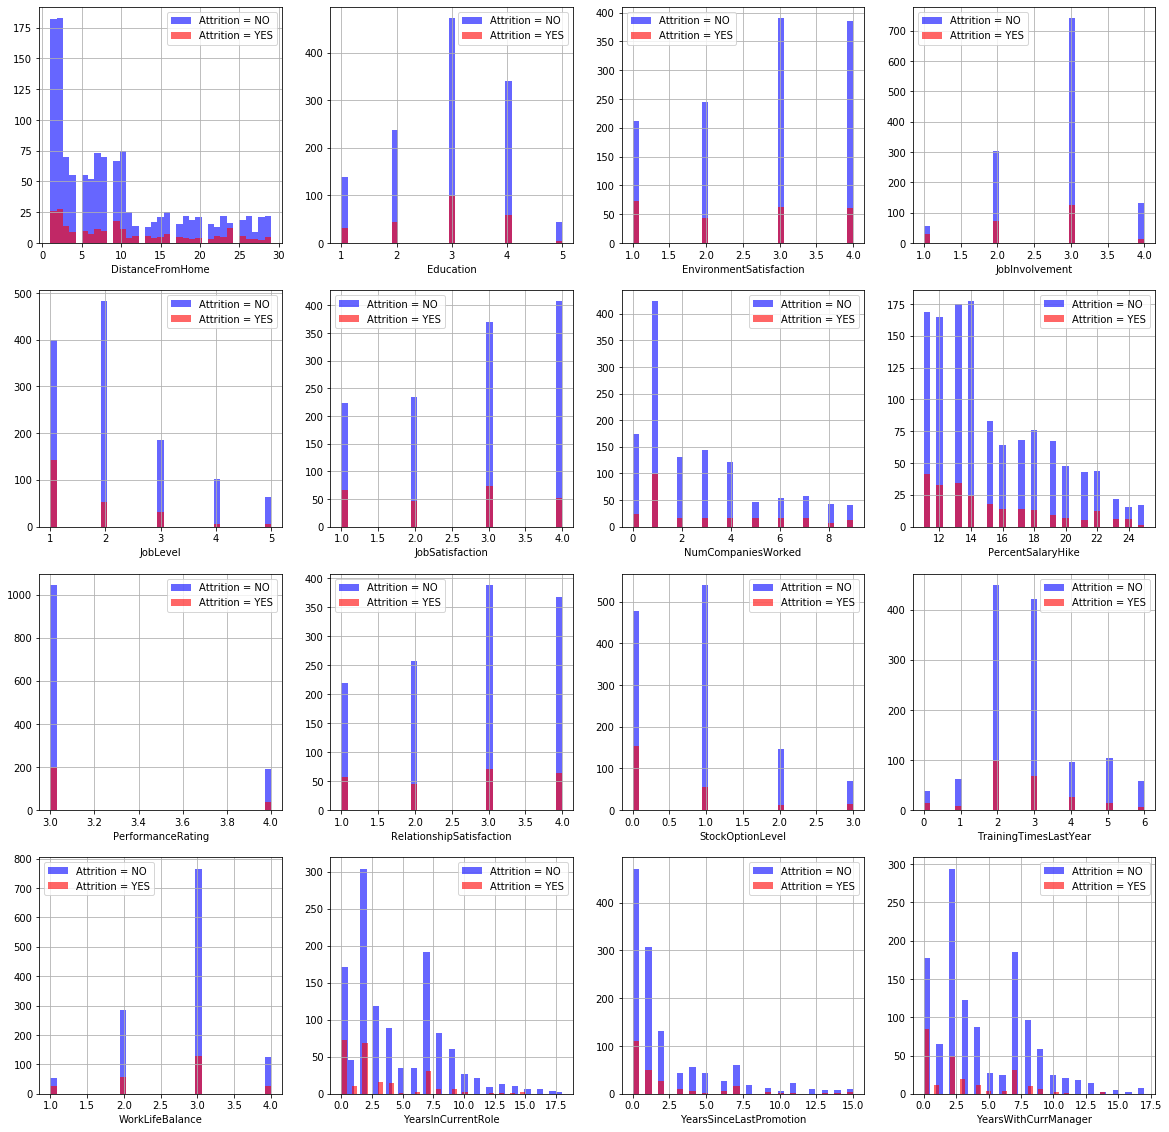

In [116]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### 2.3 Histograms to see percentage of 0 and 1 in each of Continuous Columns

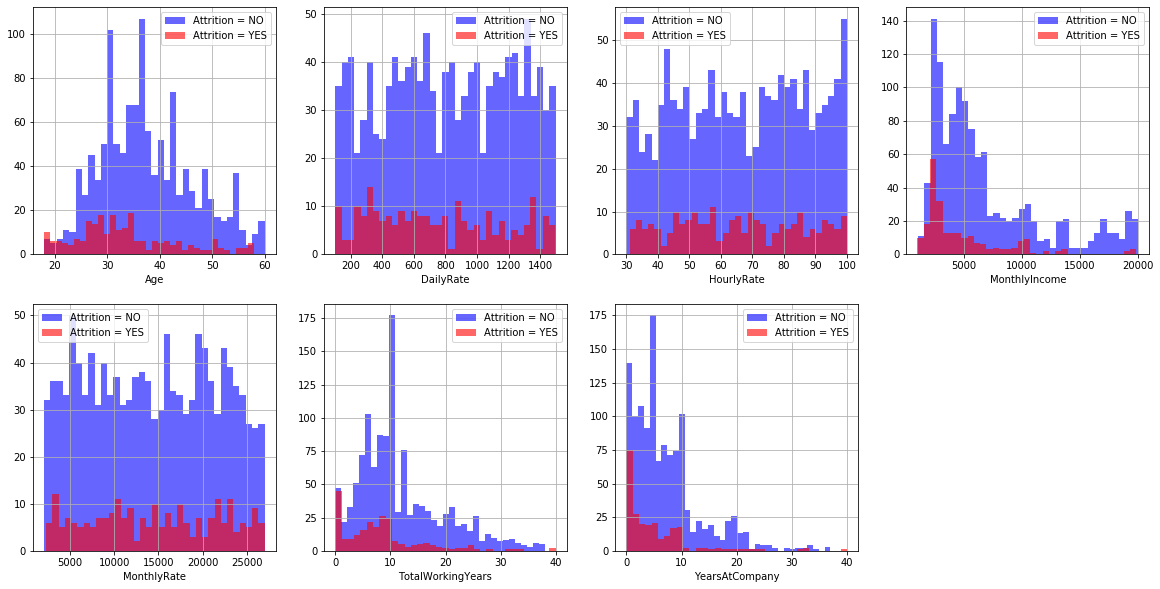

In [117]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

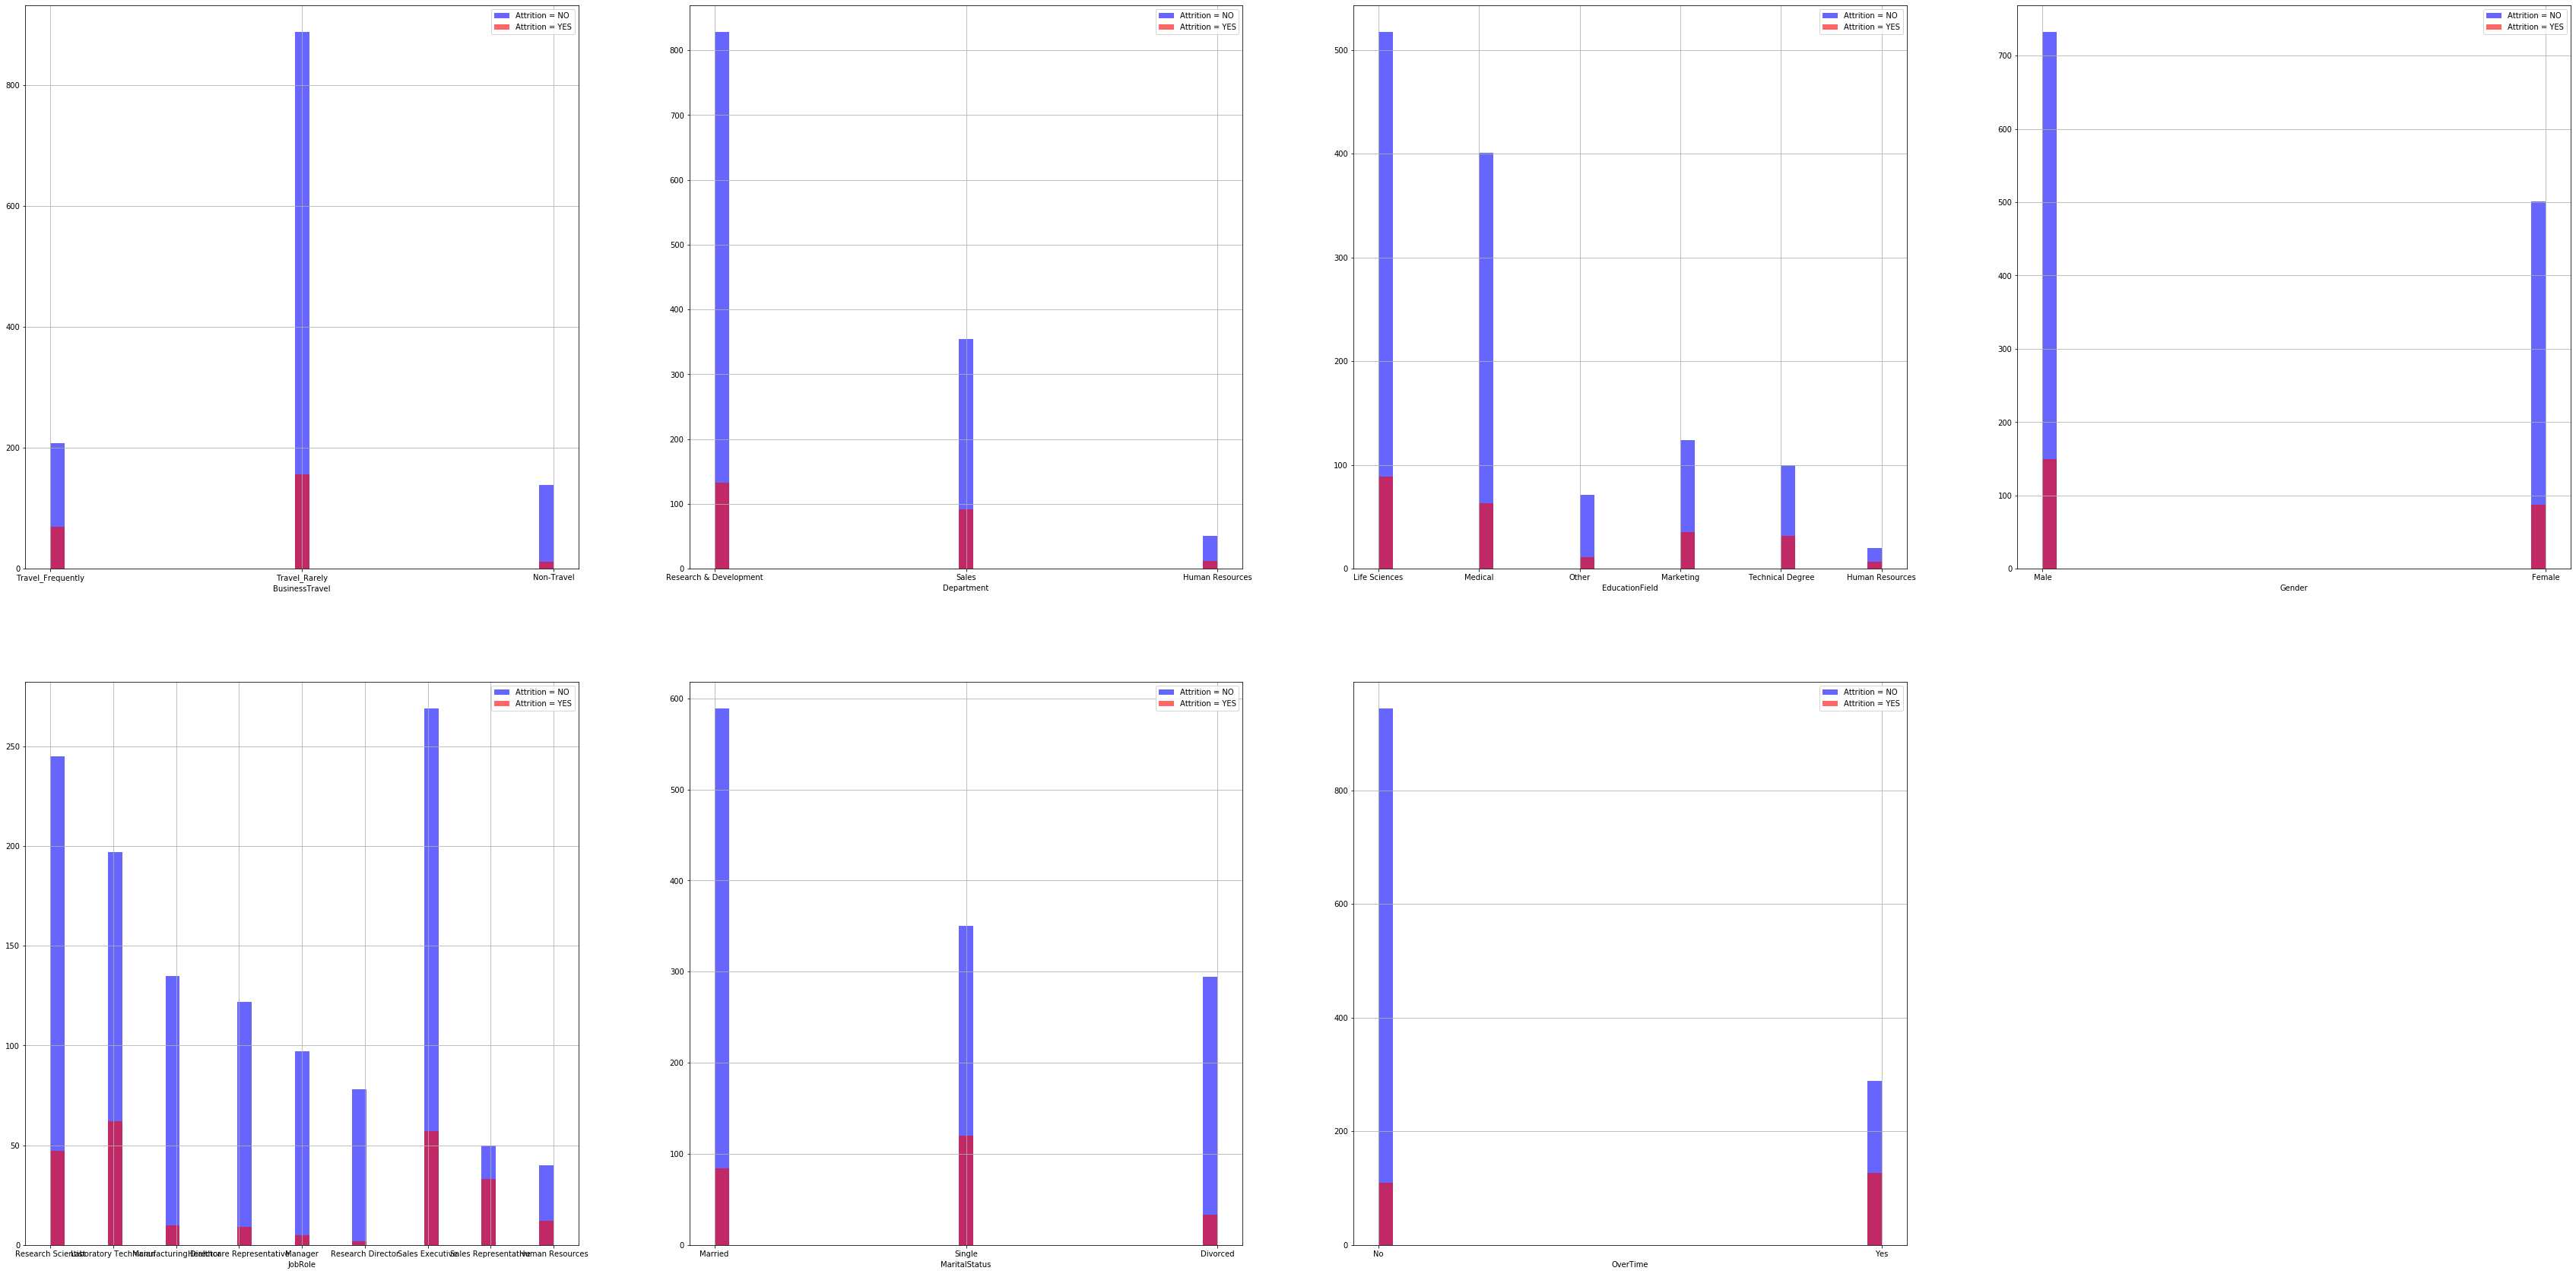

In [118]:
plt.figure(figsize=(60,30))

for i, column in enumerate(categorical, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Conclusions :


It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't 
have big impact on the detrmination of Attrition of employees.

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

In [119]:

Attrition = df[df["Attrition"] == 1]
No_Attrition = df[df["Attrition"] == 0]

In [122]:
Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Yes,14,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,No,11,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,33,3,1,Sales Representative,1,Married,1790,26956,1,No,19,3,1,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Yes,14,3,2,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,No,11,3,4,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,94,3,2,Sales Executive,3,Divorced,6728,14255,7,No,12,3,4,2,12,3,3,6,3,0,1


In [123]:
No_Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [124]:
Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### 2.4 Comparative study for Attrition and No Attrition

In [125]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = Attrition[column].value_counts().values.tolist(),
                    labels  = Attrition[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Employee Attrition",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = No_Attrition[column].value_counts().values.tolist(),
                    labels  = No_Attrition[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "No_Attrition" 
                   )


    layout = go.Layout(dict(title = column + " distribution in employee attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Employee Attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "No_Employee_Attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    df = [trace1,trace2]
    fig  = go.Figure(data = df,layout = layout)
    py.iplot(fig)

In [126]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = Attrition[column],
                          histnorm= "percent",
                          name = "Employee Attrition",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = No_Attrition[column],
                          histnorm = "percent",
                          name = "No Employee Attrition",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    df = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in employee attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=df,layout=layout)
    
    py.iplot(fig)

In [127]:
for i in categorical :
    plot_pie(i)

## Conclusion : 

Overtime_Yes, MaritalStatus_Single, JobRole_Sales Representative, JobRole_Laboratory Technician, 
JobRole_Sales Executive, JobRole_Humane Resources, BusinessTravel_Travel_Frequently, , Department_Sales, 
DistanceFromHome, EducationField_Technical, EducationField_Marketing, EducationField_Human Resources, Gender_Male

are more prone to leave the Company.

In [128]:
#for all categorical columns plot histogram    
for i in numerical :
    histogram(i)

## Conclusion :

Age(lower age people), DistanceFromHome(above 12km), EnvironmentSatisfaction(1), JobInvolvement(1,2), 
JobSatisfaction(1,2,3), MonthlyIncome(Lower Income),RelationshipSatisfaction(1), StockOptionLevel(0), 
TotalWorkingYears(1-5), YearsAtCompany(1-4), YearsInCurrentRole(0-2), YearsWithCurrManager(<1)

are more likely to leave the Company

## 2.5 Correlation Matrix

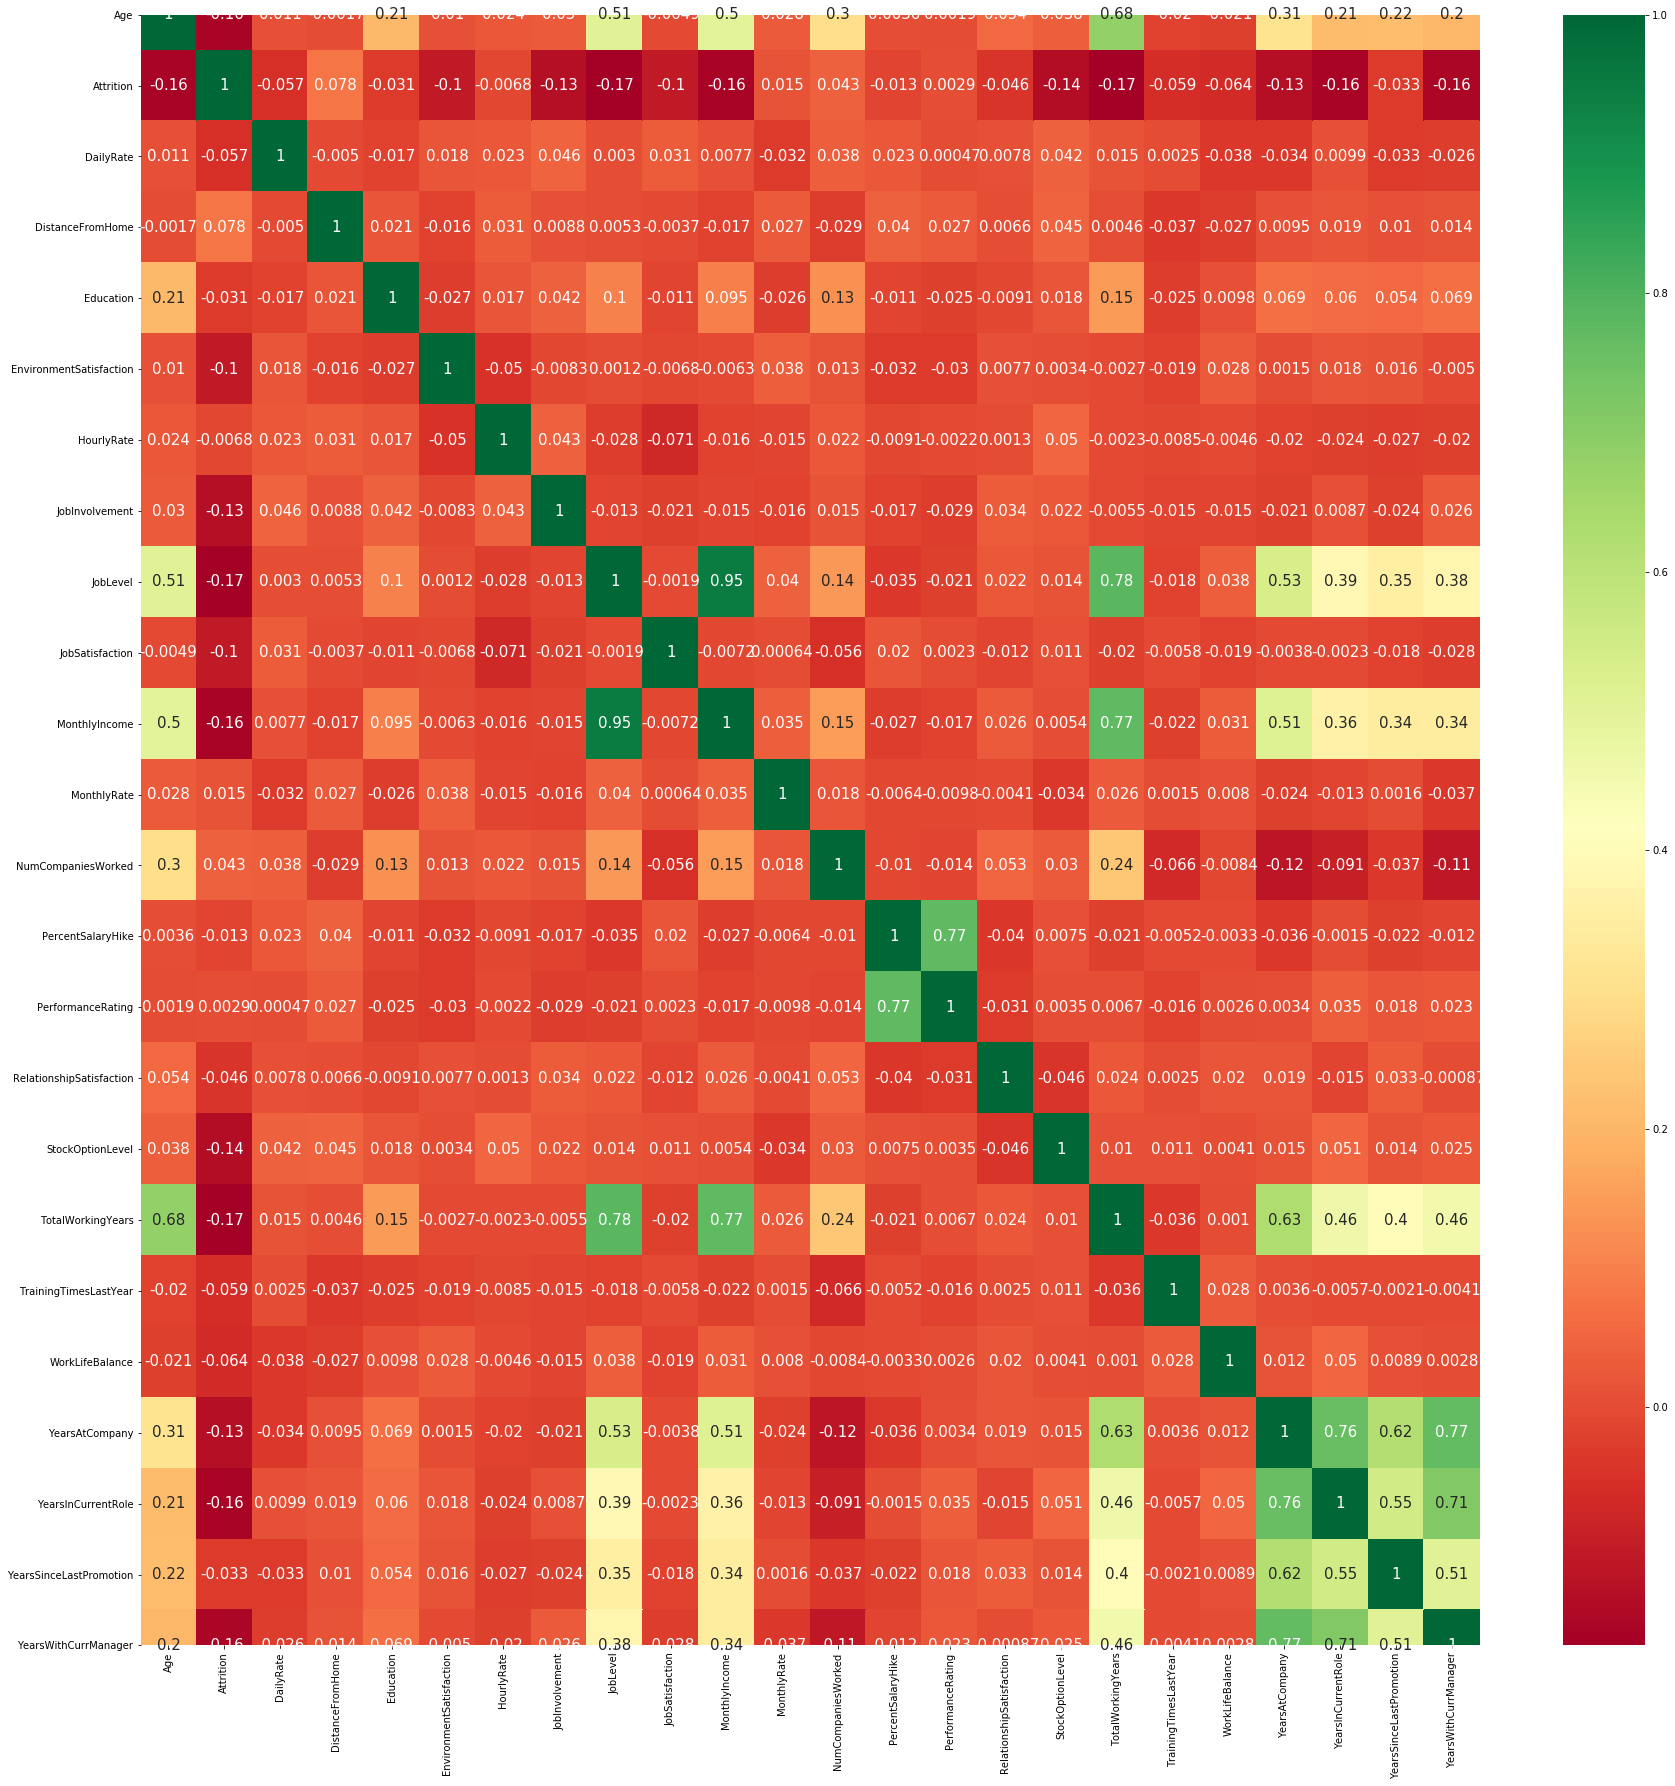

In [34]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', annot_kws={"size":15})

In [35]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
col

Index(['Attrition', 'DistanceFromHome', 'NumCompaniesWorked', 'MonthlyRate',
       'PerformanceRating', 'HourlyRate', 'PercentSalaryHike', 'Education',
       'YearsSinceLastPromotion', 'RelationshipSatisfaction', 'DailyRate',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany',
       'StockOptionLevel', 'YearsWithCurrManager', 'Age'],
      dtype='object')

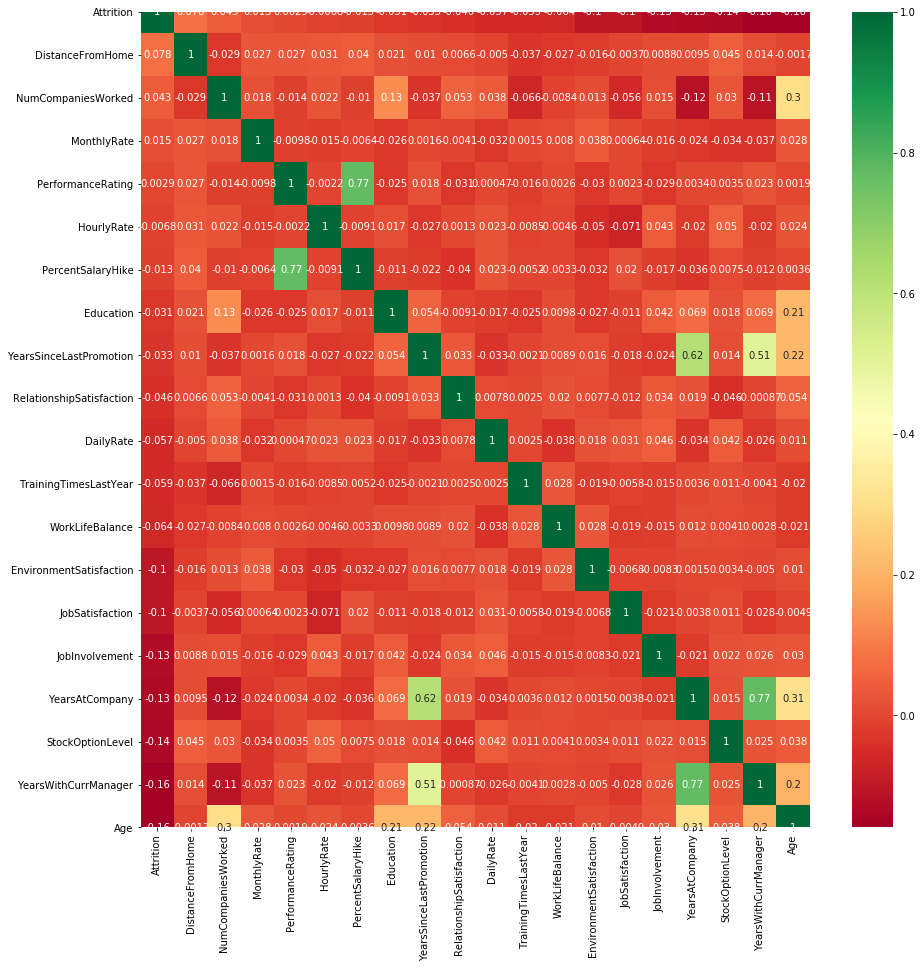

In [36]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

## Conclusion :

1.Monthly income is highly correlated with Job level.
2.Job level is highly correlated with total working hours.
3.Monthly income is highly correlated with total working hours.
4.Age is also positively correlated with the Total working hours.
5.Marital status and stock option level are negatively correlated

#### 2.5.1 Correlation with Attrition column

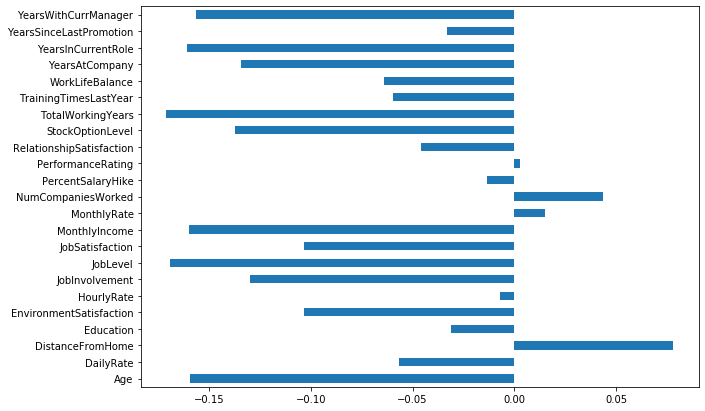

In [37]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).plot(kind='barh', figsize=(10, 7))

In [38]:
# Analysis of Correlation Result :

#PerformanceRating, PercentSalaryHike, MonthlyRate, HourlyRate are least correlated with Attrition

## 3. Feature Engineering

## 3.1 Converting Categorical into Numerical

In [39]:
data = pd.get_dummies(df, columns=categorical, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int32
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1

In [40]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [41]:
print(data.shape)

(1470, 45)


In [42]:
# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

In [43]:
# Remove Duplicate Rows
data.drop_duplicates(inplace=True)
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [44]:
print(data.shape)

(1470, 45)


### 3.2 Correlation of features with Attrition column

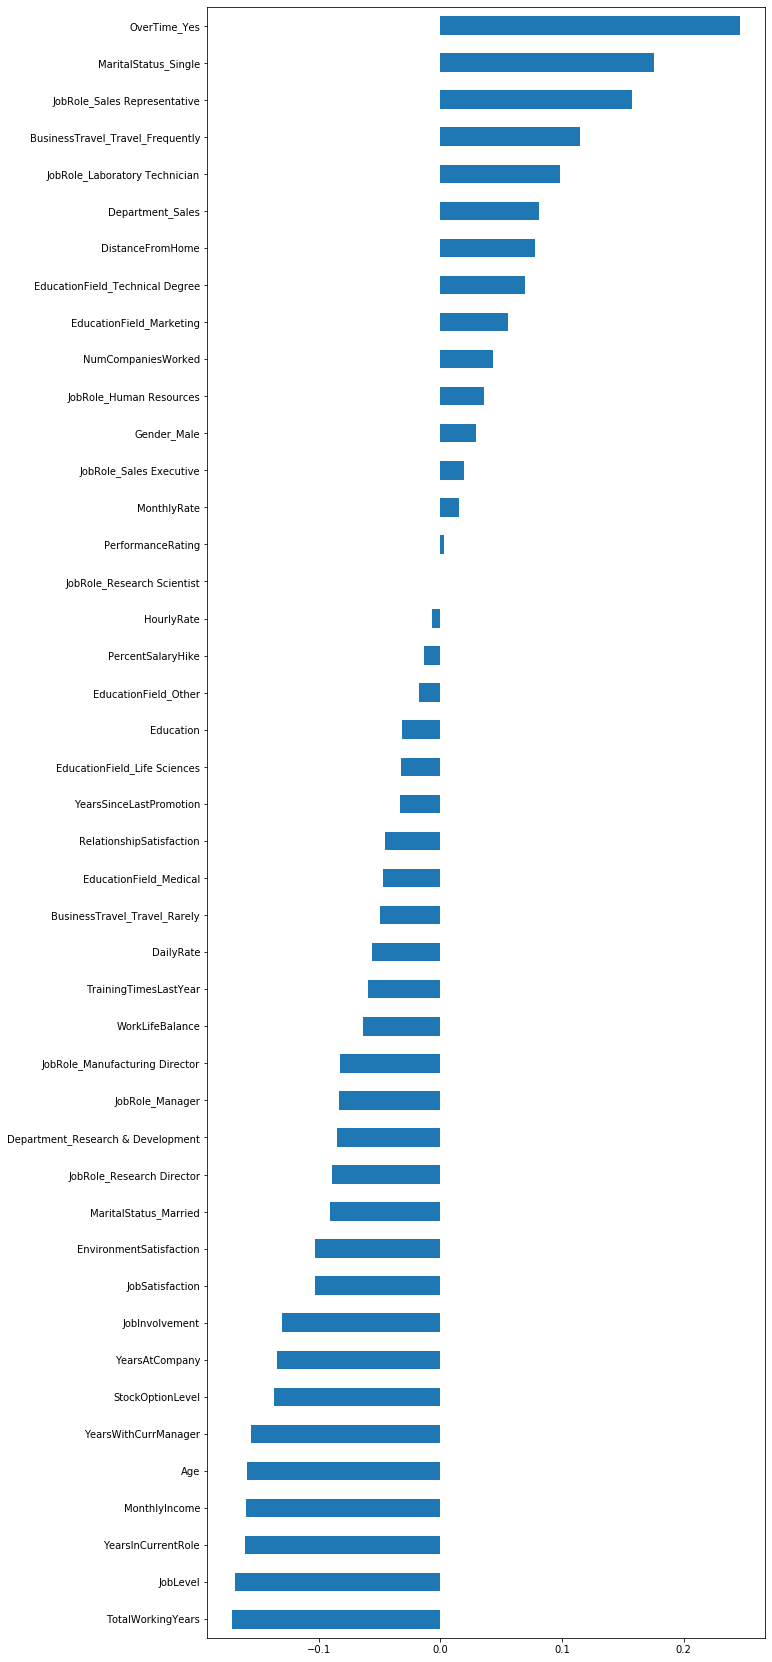

In [45]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [46]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values(ascending=True)
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
model_col

Index(['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome',
       'Age', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany',
       'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'MaritalStatus_Married', 'JobRole_Research Director',
       'Department_Research & Development', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'WorkLifeBalance',
       'TrainingTimesLastYear', 'DailyRate', 'BusinessTravel_Travel_Rarely',
       'EducationField_Medical', 'RelationshipSatisfaction',
       'YearsSinceLastPromotion', 'EducationField_Life Sciences', 'Education',
       'Gender_Male', 'JobRole_Human Resources', 'NumCompaniesWorked',
       'EducationField_Marketing', 'EducationField_Technical Degree',
       'DistanceFromHome', 'Department_Sales', 'JobRole_Laboratory Technician',
       'BusinessTravel_Travel_Frequently', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [47]:
len(model_col)

37

In [48]:
## Always remember there may always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

### 3.3 Treating Skewed Numerical Variables

In [49]:
data['MonthlyIncome'].head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

In [50]:
import numpy as np
skewed_num_features=['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

for feature in skewed_num_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
    

In [51]:
data['MonthlyIncome'].head()

0    8.698347
1    8.542861
2    7.644919
3    7.975565
4    8.151333
Name: MonthlyIncome, dtype: float64

In [52]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,8.698347,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,8.542861,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,7.644919,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,7.975565,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,8.151333,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [53]:
len(data.columns)

45

### 3.4 Feature Scaling

In [54]:

feature_scale=[feature for feature in data.columns if feature not in ['Attrition']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data[feature_scale])

StandardScaler()

In [55]:
scaler.transform(data[feature_scale])

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.91892141,
         1.45864991,  1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.91892141,
         1.45864991,  1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  1.08823234,
        -0.68556546,  1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112]])

In [56]:
# transform the train and test set, and add on the Attrition variables
data = pd.concat([data[['Attrition']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [57]:
data.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,0.219553,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,0,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.014535,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,1,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-1.366400,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,0,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.868608,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,0,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.603985,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


## 4. Building Model

In [58]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
714,1.431867,0.802025,-1.010909,-0.891688,1.169781,0.005356,0.379672,1.749610,1.153254,1.824162,-1.081899,2.525591,1.855984,2.346151,0.266233,0.241988,2.663930,-1.396086,-1.077862,-0.327893,-0.063296,-0.368715,-0.314873,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,4.168333,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241
135,-0.101159,-1.453958,-0.393938,-0.891688,-0.660531,0.891073,0.379672,-0.057788,-0.660853,-0.071049,-1.615392,1.324226,1.309341,2.346151,1.191438,1.415991,-0.550208,-2.171982,0.338096,-0.654454,-0.615492,-0.679146,-0.875581,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241
1271,-1.743687,-1.153987,-0.270544,-1.868426,-0.660531,-1.716872,0.379672,-0.961486,-0.660853,-0.992611,-1.369726,-0.678049,-0.603911,-0.426230,-0.658973,-0.932014,-1.321601,0.155707,0.338096,-0.981014,-1.167687,-0.368715,-1.155935,-0.481859,0.639841,-1.374051,1.515244,-0.837490,2.871460,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,4.087890,-0.918921,1.458650,-0.628241
477,1.431867,1.099517,-0.764121,0.085049,-1.575686,1.629171,0.379672,2.653309,-0.660853,1.891924,-0.887390,-0.678049,-1.150554,-0.426230,0.266233,0.241988,2.663930,-0.620189,0.338096,4.080672,0.212802,2.425158,0.806541,2.075297,-1.562889,-1.374051,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,3.662208,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
806,1.650871,0.474783,-0.270544,1.061787,-0.660531,1.038693,0.379672,0.845911,-0.660853,1.055914,0.141791,1.724681,1.036019,-0.426230,1.191438,-0.932014,0.864013,0.931603,0.338096,0.161947,0.488900,0.562576,-1.155935,-0.481859,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.210661,-0.130117,2.320735,0.085049,-0.660531,-0.978775,1.785511,-0.057788,0.246200,-0.630702,1.550855,-0.678049,0.489376,-0.426230,1.191438,1.415991,-0.164511,0.155707,-1.077862,0.488508,1.317193,1.183437,1.086895,-0.481859,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
1294,0.446350,-0.881285,-0.517332,0.085049,-0.660531,0.940280,1.785511,-0.057788,-0.660853,0.425164,0.171024,0.122861,-0.877232,-0.426230,-1.584178,-0.932014,-0.035946,0.155707,-2.493820,-0.654454,-0.615492,-0.368715,-0.595227,-0.481859,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,

In [60]:
X_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1041,-0.977174,0.157458,-0.517332,0.085049,1.169781,0.891073,0.379672,-0.057788,-1.567907,0.739123,1.289730,-1.078504,0.762698,-0.42623,1.191438,-0.932014,-0.678774,0.931603,0.338096,-0.327893,-0.063296,-0.368715,-0.314873,-0.481859,0.639841,-1.374051,1.515244,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,-0.628241
184,1.760373,0.697903,0.469821,-0.891688,1.169781,-0.437503,1.785511,-0.057788,-1.567907,-0.228621,1.677623,-0.678049,-1.150554,-0.42623,0.266233,1.415991,-0.807339,0.155707,0.338096,-0.491174,-0.615492,-0.368715,-0.314873,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241
1222,-1.415181,-1.394460,1.580370,-1.868426,1.169781,-0.388296,-2.432006,-0.961486,0.246200,-1.811563,-0.383410,-0.678049,-1.150554,-0.42623,0.266233,0.241988,-1.321601,-0.620189,0.338096,-0.981014,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,-1.374051,-0.659960,-0.837490,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
67,0.884358,1.330074,-0.270544,0.085049,-0.660531,-0.339090,0.379672,0.845911,-1.567907,0.948230,0.628766,-0.277594,0.489376,-0.42623,0.266233,0.241988,1.763972,-0.620189,0.338096,-0.981014,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241
220,-0.101159,1.471383,-0.517332,-0.891688,1.169781,-0.191470,0.379672,-0.057788,-0.660853,0.199575,-0.613897,2.125136,0.216054,-0.42623,1.191438,-0.932014,0.606882,0.155707,1.754054,0.978348,1.869389,0.252146,0.806541,-0.481859,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,-0.429664,-0.923430,-0.270544,0.085049,1.169781,-0.585122,0.379672,-0.057788,-1.567907,-0.254900,0.441706,-1.078504,-0.330589,-0.42623,-1.584178,1.415991,-0.807339,-0.620189,0.338096,-0.491174,-0.339394,-0.679146,-0.314873,2.075297,-1.562889,-1.374051,1.515244,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565,-0.628241
331,-1.086676,-1.468833,-1.010909,-1.868426,0.254625,0.349801,0.379672,-0.057788,-0.660853,0.306429,1.095362,-1.078504,-0.603911,-0.42623,1.191438,0.241988,-0.678774,-2.171982,0.338096,-0.327893,-0.063296,-0.368715,-0.034520,-0.481859,-1.562889,-1.374051,1.515244,-0.837490,2.871460,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.33

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test):
    pred = clf.predict(X_test)
    print("Test Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print("Classification Report:", end='')
    print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
    print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
    print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### 4.1 Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [63]:
print_score(lr, X_train, y_train, X_test, y_test) 

Test Result:
Accuracy Score: 87.76%
_______________________________________________
Classification Report:	Precision Score: 58.54%
			Recall Score: 39.34%
			F1 score: 47.06%
_______________________________________________
Confusion Matrix: 
 [[363  17]
 [ 37  24]]



### 4.2 Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1200, 
#                                      bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)                                                      

In [65]:
print_score(rf, X_train, y_train, X_test, y_test) 

Test Result:
Accuracy Score: 86.39%
_______________________________________________
Classification Report:	Precision Score: 54.55%
			Recall Score: 9.84%
			F1 score: 16.67%
_______________________________________________
Confusion Matrix: 
 [[375   5]
 [ 55   6]]



#### 4.2.1 Feature Importance according to Random Forest

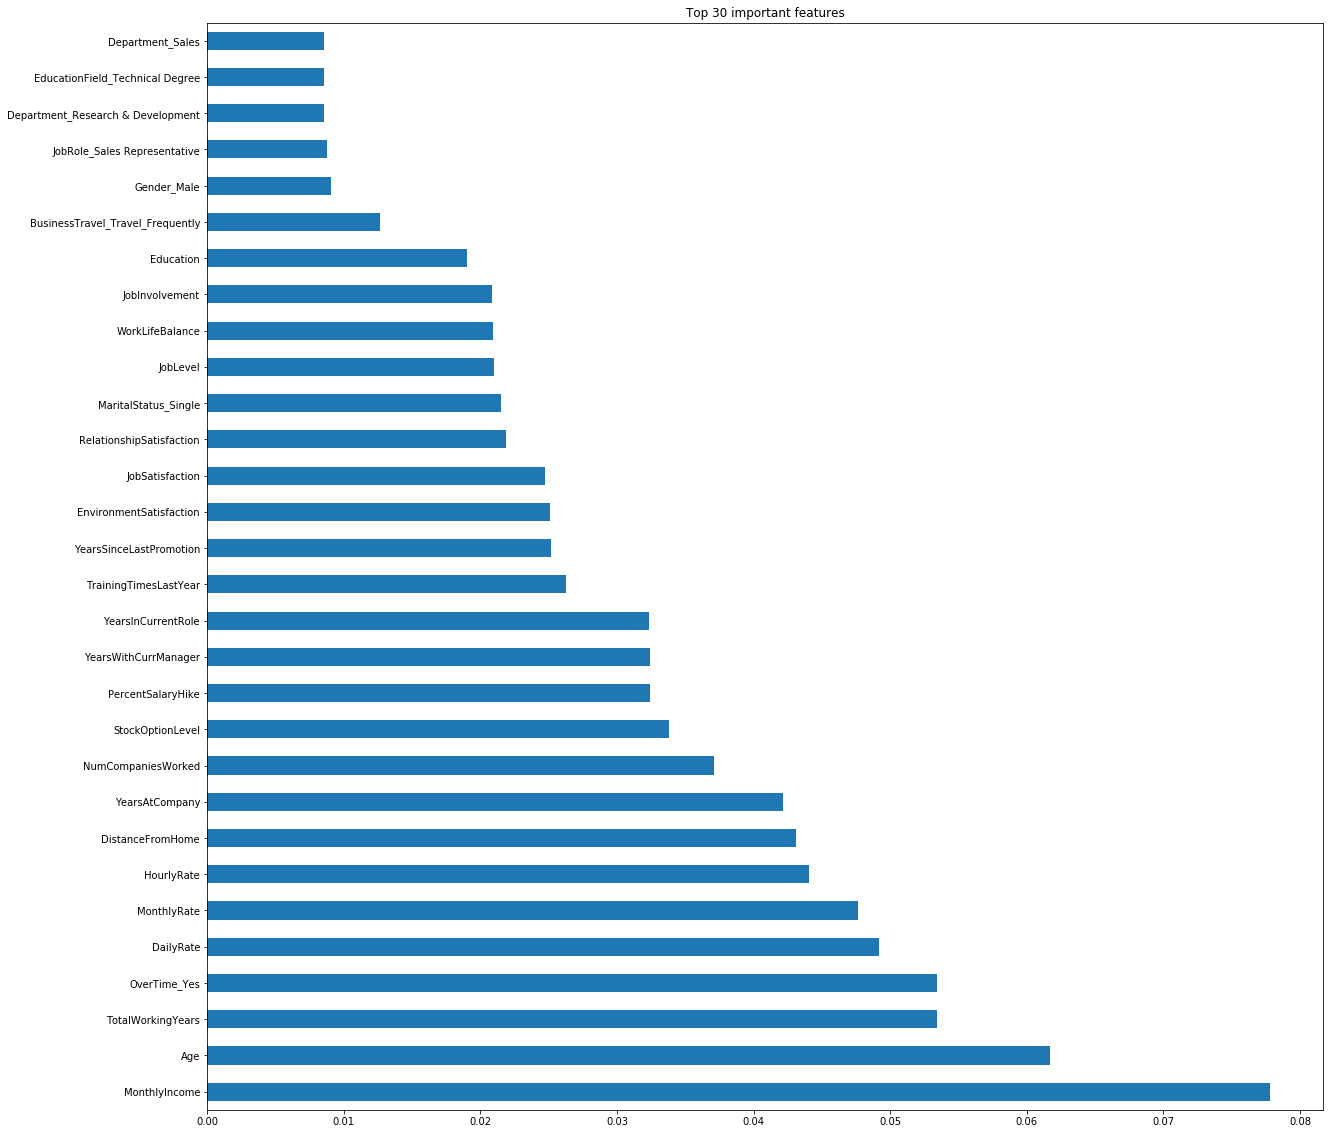

In [66]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.title("Top 30 important features")
plt.show()

### 4.3 Support Vector Machine

In [67]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [68]:
print_score(svc, X_train, y_train, X_test, y_test)

Test Result:
Accuracy Score: 87.53%
_______________________________________________
Classification Report:	Precision Score: 58.33%
			Recall Score: 34.43%
			F1 score: 43.30%
_______________________________________________
Confusion Matrix: 
 [[365  15]
 [ 40  21]]



### 4.4 XGB Classifier

In [69]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
print_score(xgb_clf, X_train, y_train, X_test, y_test)

Test Result:
Accuracy Score: 86.85%
_______________________________________________
Classification Report:	Precision Score: 54.55%
			Recall Score: 29.51%
			F1 score: 38.30%
_______________________________________________
Confusion Matrix: 
 [[365  15]
 [ 43  18]]



#### 4.4.1 Feature Importance according to XGBoost

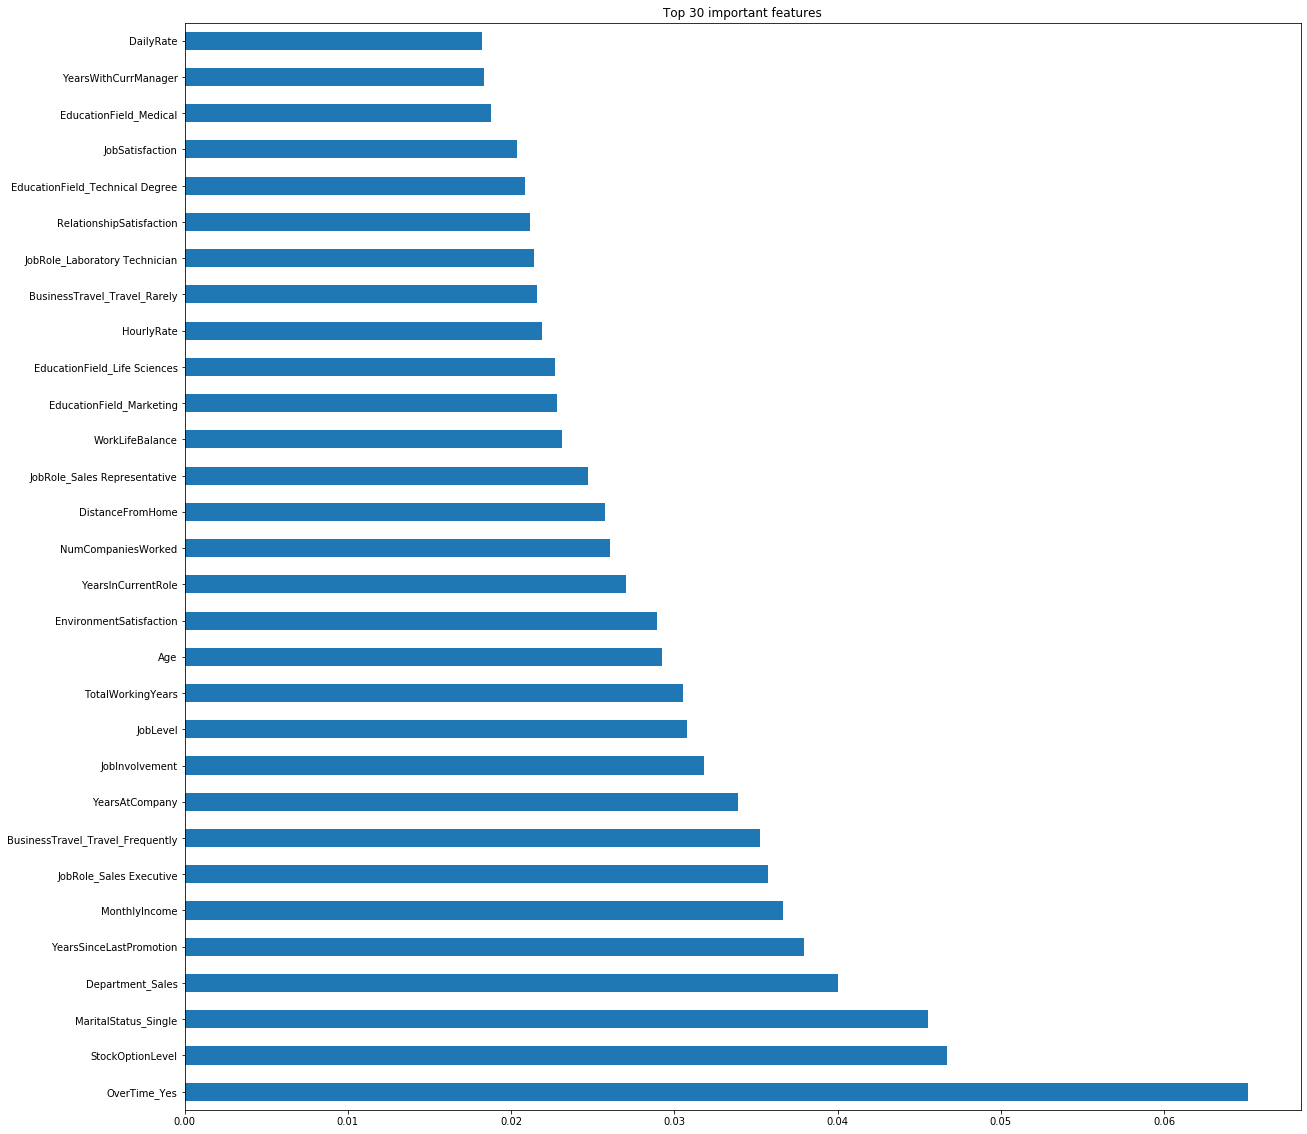

In [71]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.title("Top 30 important features")
plt.show()

 ## 5. Balance the dataset

In [72]:
 pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [73]:
from imblearn.over_sampling import SMOTE


oversampler = SMOTE(random_state = 0)
smote_train, smote_traintarget = oversampler.fit_sample(X_train, y_train) 

In [74]:
smote_train.shape

(1706, 44)

In [75]:
X_train.shape

(1029, 44)

In [76]:
##Balance the data for test set a well :

oversampler = SMOTE(random_state = 0)
smote_test, smote_testtarget = oversampler.fit_sample(X_test, y_test) 

In [77]:
smote_testtarget.shape

(760,)

### 5.1 Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(smote_train, smote_traintarget)


LogisticRegression(penalty='l1', solver='liblinear')

In [79]:
print_score(lr, smote_train, smote_traintarget, smote_test, smote_testtarget)

Test Result:
Accuracy Score: 73.29%
_______________________________________________
Classification Report:	Precision Score: 78.10%
			Recall Score: 64.74%
			F1 score: 70.79%
_______________________________________________
Confusion Matrix: 
 [[311  69]
 [134 246]]



### 5.2 Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1200, 
#                                      bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf.fit(smote_train, smote_traintarget)
rf_pred = rf.predict(smote_test)


In [81]:
print_score(rf, smote_train, smote_traintarget, smote_test, smote_testtarget)

Test Result:
Accuracy Score: 82.50%
_______________________________________________
Classification Report:	Precision Score: 98.05%
			Recall Score: 66.32%
			F1 score: 79.12%
_______________________________________________
Confusion Matrix: 
 [[375   5]
 [128 252]]



### 5.3 Support Vector Machine

In [82]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(smote_train, smote_traintarget)

SVC(kernel='linear')

In [83]:
print_score(svc, smote_train, smote_traintarget, smote_test, smote_testtarget)

Test Result:
Accuracy Score: 73.03%
_______________________________________________
Classification Report:	Precision Score: 76.92%
			Recall Score: 65.79%
			F1 score: 70.92%
_______________________________________________
Confusion Matrix: 
 [[305  75]
 [130 250]]



### 5.4 XGB Classifier

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1)

# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }



random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=400, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [85]:
random_search.fit(smote_train, smote_traintarget)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 18.2min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [86]:

print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

{'mean_fit_time': array([ 4.94322658,  5.49178066,  3.71921659,  5.79358935,  1.33896065,
        6.24985957,  1.6850565 ,  1.13553576,  2.52666712,  1.01424737,
        1.52933793,  0.94497023,  4.52116709,  2.62207732,  5.18019509,
        1.35772972,  8.54809875,  0.93425689,  2.79715524,  2.56564426,
        2.89655361,  5.27761717,  2.05475059,  4.22413325,  7.15098624,
        1.67606783,  1.31831284,  1.34876366, 10.11807413,  3.80042987,
        7.56858034,  4.69900723,  7.16113701,  2.07900467,  6.10348988,
        8.75897021,  0.98962054, 11.02999239,  6.38039885,  5.87909298,
        1.28471017,  3.49750013,  1.33344278,  1.07774525,  7.52671075,
        1.84712152,  3.27132468,  0.86705122,  2.98801541, 10.92285194,
        1.35448999,  2.24429932,  8.19103899,  7.91235328,  7.65116334,
        0.99023657,  1.32870216,  1.645892  ,  3.26580024,  7.82011933,
        2.27017226,  4.81511321,  5.97013888, 10.09825592,  5.14102688,
        1.57369766,  6.3100708 ,  2.24873319, 

In [87]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf.fit(smote_train, smote_traintarget)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
print_score(xgb_clf, smote_train, smote_traintarget, smote_test, smote_testtarget)

Test Result:
Accuracy Score: 87.63%
_______________________________________________
Classification Report:	Precision Score: 96.73%
			Recall Score: 77.89%
			F1 score: 86.30%
_______________________________________________
Confusion Matrix: 
 [[370  10]
 [ 84 296]]

